<a href="https://colab.research.google.com/github/BalveerSinghYT/Aqua-Serving-Robot/blob/master/Final_Copy_layoutparser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "layoutparser[paddledetection]"
!pip install layoutparser torchvision
!pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip install "layoutparser[ocr]"
!pip install python-doctr[torch]
!sudo apt install tesseract-ocr
!sudo apt-get install poppler-utils
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 596 kB 50.1 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 108.8 MB 22 kB/s 
     |████████████████████████████████| 5.6 MB 19.4 MB/s 
     |████████████████████████████████| 3.1 MB 47.8 MB/s 
     |████████████████████████████████| 142 kB 50.0 MB/s 
     |████████████████████████████████| 4.1 MB 32.7 MB/s 
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=3b4651ea28e4e6f7d4d2f376162bf49a1f9d84dd6b41052524642f886104a7e5
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built iopath
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-3ld2xaa4/detectron2_52f7abc8bd53477ab1611bb08c7961ef
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-3ld2xaa4/detectron2_52f7abc8bd53477ab1611bb08c7961ef
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
     |████████████████████████████████| 50 kB 4.0 MB/s 
     |████████████████████████████████| 79 kB 9.1 MB/s 
     |████████████████████████████████| 151 kB 58.0 MB/s 
     |████████████████████████████████| 130 kB 44.6 MB/s 
     |████████████████████████████████| 843 kB 44.3 MB/s 
     |████████████████████████████████| 117 kB 59.2 MB/s 
  Created wheel for detectron2: filename=detectron2-0.5-cp37-cp37m-linux_x86_6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 7.5 MB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 205 kB 9.0 MB/s 
     |████████████████████████████████| 101 kB 14.4 MB/s 
     |████████████████████████████████| 2.8 MB 62.6 MB/s 
     |████████████████████████████████| 2.0 MB 43.2 MB/s 
     |████████████████████████████████| 88 kB 9.6 MB/s 
     |████████████████████████████████| 235 kB 55.1 MB/s 
     |████████████████████████████████| 604 kB 56.9 MB/s 
     |████████████████████████████████| 365 kB 59.9 MB/s 
     |████████████████████████████████| 104 kB 77.8 MB/s 
     |████████████████████████████████| 45 kB 4.8 MB/s 
     |████████████████████████████████| 88 kB 8.8 MB/s 
     |████████████████████████████████| 2.0 MB 24.4 MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.5.1-py3-none-any.whl size=20820 sha256=8afa6cb49987a8a6d64dc702e6f0c1bf8d5095a84c73d959bd72c002445bd1d0
  Stored in directory: /root/.cache/pip/wheels/ae/cd/1

In [ ]:
import cv2
import  layoutparser as lp
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import os
os.environ['USE_TORCH'] = '1'
import numpy as np

In [ ]:
def get_layout_objs(image_name,nms_thresh):
  image=cv2.imread(image_name)
 
  
  model = lp.Detectron2LayoutModel(
              config_path ='https://www.dropbox.com/s/ld9izb95f19369w/config.yaml?dl=1', # In model catalog
              label_map   ={1: "Equation"}, # In model`label_map`
              extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
          )
  layout=model.detect(image)
  lp.draw_box(image,layout,show_element_type=True)

  eq_blocks = lp.Layout([b for b in layout if b.type=='Equation'])

  # Tables
 
  model = lp.Detectron2LayoutModel(
              config_path ='lp://TableBank/faster_rcnn_R_50_FPN_3x/config', # In model catalog
              label_map   ={0: "Table"}, # In model`label_map`
              extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
          )
  layout=model.detect(image)
  lp.draw_box(image,layout,show_element_type=True)

  tb_blocks = lp.Layout([b for b in layout if b.type=='Table'])

  
    
  model = lp.Detectron2LayoutModel(
              config_path ='https://www.dropbox.com/s/yc92x97k50abynt/config.yaml?dl=1', # In model catalog
              label_map   ={1:"Text", 2:"Image", 3:"Table", 4:"Maths", 5:"Separator", 6:"Other"}, # In model`label_map`
              extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.4] # Optional
          )
  layout=model.detect(image)
  lp.draw_box(image,layout,show_element_type=True)
  text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
  figure_blocks = lp.Layout([b for b in layout if b.type=='Image'])
  text_blocks = lp.Layout([b for b in text_blocks \
                    if not any(b.is_in(b_fig) for b_fig in figure_blocks)])
  
  ocr_agent = lp.TesseractAgent(languages='eng')
      # Initialize the tesseract ocr engine. You might need
      # to install the OCR components in layoutparser:
      # pip install layoutparser[ocr]
  
  images = figure_blocks.to_dict()['blocks']
  eqs = eq_blocks.to_dict()['blocks']
  tables = tb_blocks.to_dict()['blocks']
  
  layout_objs = []
  table_objs = []
  equation_objs = []

  for img in images:
      layout_objs.append(((int(img['x_1']),int(img['x_2']),int(img['y_1']),int(img['y_2'])),img['type']))
  for table in tables:
      layout_objs.append((( int(table['x_1']) ,int(table['x_2']),int(table['y_1']),int(table['y_2'])),table['type']))
      table_objs.append((( int(table['x_1']) ,int(table['x_2']),int(table['y_1']),int(table['y_2'])),table['type']))
  for equation in eqs:
      layout_objs.append((( int(equation['x_1']), int(equation['x_2']), int(equation['y_1']), int(equation['y_2'])),equation['type']))
      equation_objs.append((( int(equation['x_1']), int(equation['x_2']), int(equation['y_1']), int(equation['y_2'])),equation['type']))
  return layout_objs



def get_doctr_objs(filename):
  doc = DocumentFile.from_images(filename)
  predictor = ocr_predictor(pretrained = True)
  res = predictor(doc)
  res.show(doc)
  return res.export()


def iou(a, b):
  x1 = max(a[0], b[0])
  y1 = max(a[2], b[2])
  x2 = min(a[1], b[1])
  y2 = min(a[3], b[3])

  # AREA OF OVERLAP - Area where the boxes intersect
  width = (x2 - x1)
  height = (y2 - y1)
  # handle case where there is NO overlap
  if (width<0) or (height <0):
      return 0
  area_overlap = width * height

  # COMBINED AREA
  area_a = (a[1] - a[0]) * (a[3] - a[2])
  area_b = (b[1] - b[0]) * (b[3] - b[2])
  area_combined = area_a + area_b - area_overlap

  # RATIO OF AREA OF OVERLAP OVER COMBINED AREA
  iou = area_overlap / (area_combined)
  return iou




def image_main(filename):
  NMS_THRESH = 0.001
  lobjs = get_layout_objs(filename,NMS_THRESH)
  # print(lobjs)
  res = get_doctr_objs(filename)    
  img = cv2.imread(filename)
  h,w = img.shape[:-1]
 
  #start writing hocr
  header = f'''
    <?xml version="1.0" encoding="UTF-8"?>
    <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
    <html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
    <head>
    <title>
    </title>
    <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
    <meta content="tesseract 5.0.0-alpha-20201231-256-g73a32" name="ocr-system"/>
    <meta content="ocr_page ocr_carea ocr_par ocr_line ocrx_word ocrp_wconf" name="ocr-capabilities"/>
    </head>
    <body>
    <div class="ocr_page" id="page_1" title='image "{filename}"; bbox 0 0 {h} {w}; ppageno 0'>
    '''
  hocr=""
  hocr+=header
   #for all layoutblocks 

  TEXT_NMS_THRESH=0.02
  NMS_THRESH = 0.0007
  text_added_status = {}
  block_ind = 0
  for doc_blk in res['pages'][0]['blocks']:
      index = 0
      text_added_status[block_ind] = {} 
      for line in doc_blk['lines']:
        text_added_status[block_ind][index] = [True,None]
        index+=1
      block_ind+=1

  # print(text_added_status)

  for b in lobjs:
    added = False
    block_ind = 0
    for doc_blk in res['pages'][0]['blocks']:
      index = 0
      lp_blk = [b[0][0]/w, b[0][1]/w , b[0][2]/h, b[0][3]/h]
      for line in doc_blk['lines']:
        # NMS with least priority to Prima Layout Model  
        iouval = iou((line['geometry'][0][0],line['geometry'][1][0],line['geometry'][0][1],line['geometry'][1][1]),lp_blk)
        if(iouval>=NMS_THRESH):
          if not added:
            text_added_status[block_ind][index]=[False,b]
            added = True
          else:
            text_added_status[block_ind][index]=[False,None]
        index+=1
      block_ind+=1

  # print(text_added_status)
  block_ind = 0
  for doc_blk in res['pages'][0]['blocks']:
    index = 0
    for line in doc_blk['lines']:
      # print(text_added_status[block_ind][index][0])
      if text_added_status[block_ind][index][0]:
        # print("layoutout")
        # print(lp_blk)
        # print("line")
        # print(line)
        # print("iou")
        # print(iou((line['geometry'][0][0],line['geometry'][1][0],line['geometry'][0][1],line['geometry'][1][1]),lp_blk))
        sent=''
        blk = ''
        tag = b[1]
        for word in line['words']:
          blk=blk+' '+word['value']
        bbox=str(int(line['geometry'][0][0]*w))+" "+str(int(line['geometry'][1][0]*w))+" "+str(int(line['geometry'][0][1]*h))+" "+str(int(line['geometry'][1][1]*h))
        sent = f'   <span class="ocr_sent" title="bbox {bbox};">{blk}\n'
        hocr+=sent
        # print("text")
        # print(blk)

      elif text_added_status[block_ind][index][1] is not None:
        if text_added_status[block_ind][index][1][1].find("Table")!=-1:
          coords = text_added_status[block_ind][index][1][0]
          tab = img[coords[2]:coords[3],coords[0]:coords[1],:]
          tab_name = f"{os.path.basename(filename)[:-4]}table{str(block_ind)+str(index)}.jpg"
          cv2.imwrite(tab_name,tab)
          sent = f'   <img class="ocr_tab" title="bbox {" ".join([str(i) for i in coords])} src="{tab_name}";> \n'
          hocr+=sent
        elif text_added_status[block_ind][index][1][1].find("Equation")!=-1:
          coords = text_added_status[block_ind][index][1][0]
          eq = img[coords[2]:coords[3],coords[0]:coords[1],:]
          eq_name = f"{os.path.basename(filename)[:-4]}table{str(block_ind)+str(index)}.jpg"
          cv2.imwrite(eq_name,eq)
          sent = f'   <img class="ocr_eq" title="bbox {" ".join([str(i) for i in coords])} src="{eq_name}";> \n'
          hocr+=sent
        elif text_added_status[block_ind][index][1][1].find("Image")!=-1:
          coords = text_added_status[block_ind][index][1][0]
          im = img[coords[2]:coords[3],coords[0]:coords[1],:]
          im_name = f"{os.path.basename(filename)[:-4]}table{str(block_ind)+str(index)}.jpg"
          cv2.imwrite(im_name,im)
          sent = f'   <img class="ocr_im" title="bbox {" ".join([str(i) for i in coords])} src="{im_name}";> \n'
          hocr+=sent
      index+=1
    block_ind+=1
  print(hocr)

  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/layoutparser/visualization.py:392: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_w, text_h = font_obj.getsize(text)
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.c

[((230, 1416, 1055, 1474), 'Table')]


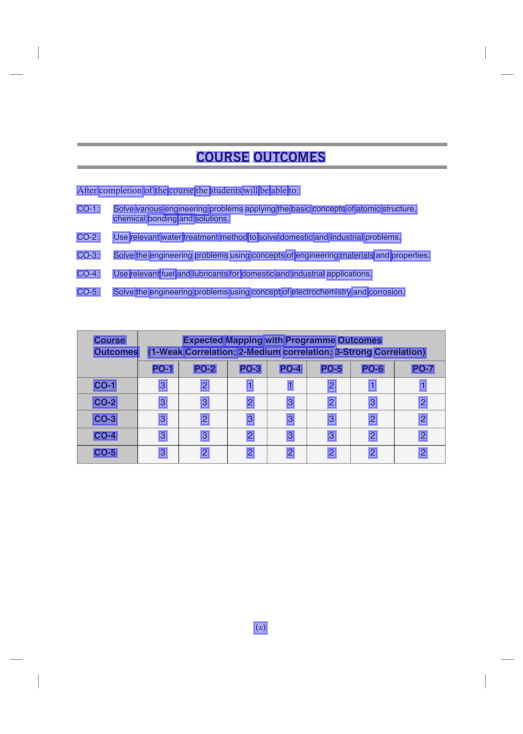

{0: {0: [True, None]}, 1: {0: [True, None]}, 2: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None]}, 3: {0: [True, None]}, 4: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None]}, 5: {0: [True, None]}, 6: {0: [True, None]}, 7: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None]}, 8: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None]}, 9: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None]}, 10: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None]}, 11: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None]}, 12: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None]}, 13: {0: [True, None], 1: [True, None], 2: [True

  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


[((231, 1426, 1187, 1730), 'Table'), ((443, 821, 1278, 1350), 'Equation'), ((793, 1094, 1653, 1729), 'Equation'), ((451, 811, 1356, 1420), 'Equation'), ((793, 1103, 1277, 1348), 'Equation'), ((1078, 1435, 1271, 1354), 'Equation'), ((793, 1102, 1344, 1438), 'Equation'), ((455, 799, 1591, 1648), 'Equation'), ((225, 492, 1667, 1733), 'Equation'), ((791, 1104, 1577, 1661), 'Equation')]


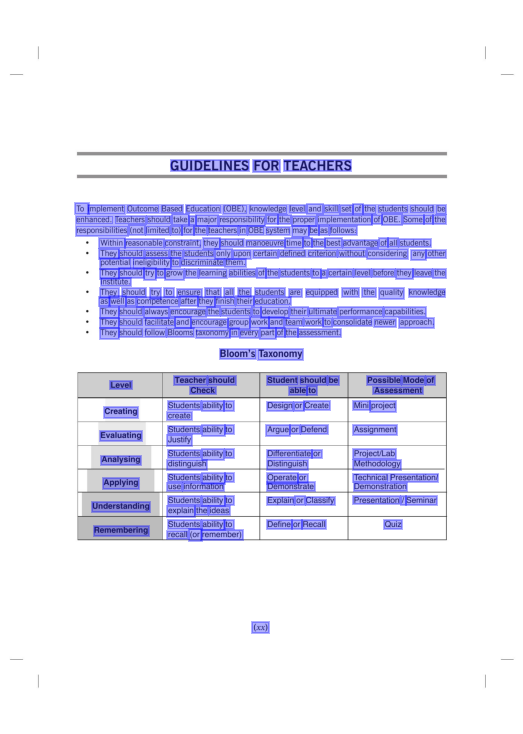

{0: {0: [True, None]}, 1: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None], 6: [True, None], 7: [True, None]}, 2: {0: [True, None]}, 3: {0: [True, None]}, 4: {0: [True, None]}, 5: {0: [True, None]}, 6: {0: [True, None]}, 7: {0: [True, None]}, 8: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None], 6: [True, None], 7: [True, None], 8: [True, None], 9: [True, None], 10: [True, None], 11: [True, None], 12: [True, None]}, 9: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None], 6: [True, None], 7: [True, None], 8: [True, None], 9: [True, None]}, 10: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None], 6: [True, None], 7: [True, None], 8: [True, None], 9: [True, None]}, 11: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None]}, 12: {0: [True, None]}, 13: {0: [T

  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


[((277, 290, 1764, 1777), 'Image'), ((1007, 1398, 642, 944), 'Image'), ((1300, 1425, 1204, 1349), 'Image'), ((1302, 1435, 1758, 1937), 'Image'), ((297, 660, 651, 970), 'Image')]


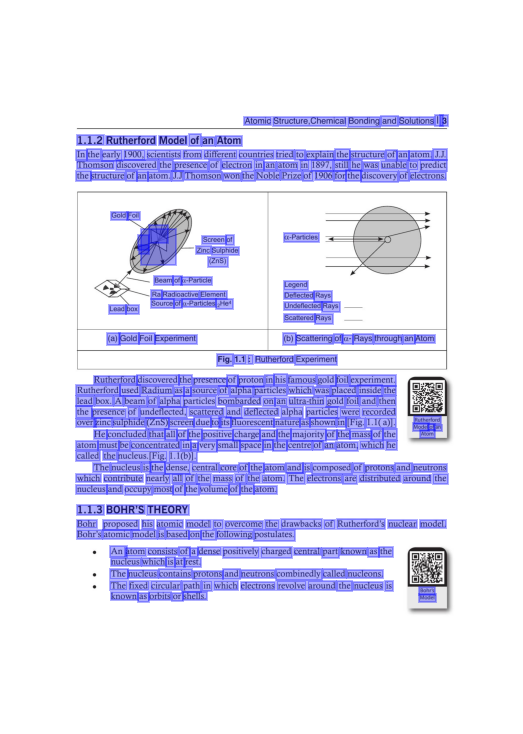

{0: {0: [True, None]}, 1: {0: [True, None]}, 2: {0: [True, None], 1: [True, None], 2: [True, None]}, 3: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None]}, 4: {0: [True, None], 1: [True, None], 2: [True, None]}, 5: {0: [True, None]}, 6: {0: [True, None], 1: [True, None], 2: [True, None]}, 7: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None]}, 8: {0: [True, None]}, 9: {0: [True, None]}, 10: {0: [True, None]}, 11: {0: [True, None]}, 12: {0: [True, None], 1: [True, None], 2: [True, None], 3: [True, None], 4: [True, None], 5: [True, None], 6: [True, None]}, 13: {0: [True, None], 1: [True, None]}, 14: {0: [True, None]}, 15: {0: [True, None], 1: [True, None]}, 16: {0: [True, None]}, 17: {0: [True, None]}, 18: {0: [True, None]}, 19: {0: [True, None]}, 20: {0: [True, None], 1: [True, None], 2: [True, None]}, 21: {0: [True, None], 1: [True, None]}, 22: {0: [True, None], 1: [True, None]}}
{0: {0: [True, None]}, 1: {0: [True, None]}, 2: {0: [Tr

In [ ]:
from pdf2image import convert_from_path

images = convert_from_path("/content/DIP121EN_Applied Chemistry 28-02-2022 (1).pdf")
idx = 0
for i in images:
  i.save("DIP121EN_Applied Chemistry 28-02-2022-"+str(idx)+".jpg","JPEG")
  image_main("DIP121EN_Applied Chemistry 28-02-2022-"+str(idx)+".jpg")